In [1]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 2

Training with activation: logistic
Epoch 0, Train Loss: 2.3654, Val Loss: 2.3468
Epoch 10, Train Loss: 2.3016, Val Loss: 2.2929
Epoch 20, Train Loss: 2.2679, Val Loss: 2.2640
Epoch 30, Train Loss: 2.2274, Val Loss: 2.2251
Epoch 40, Train Loss: 2.1727, Val Loss: 2.1711
Epoch 50, Train Loss: 2.1070, Val Loss: 2.1061
Epoch 60, Train Loss: 2.0347, Val Loss: 2.0348
Epoch 70, Train Loss: 1.9596, Val Loss: 1.9609
Epoch 80, Train Loss: 1.8863, Val Loss: 1.8886
Epoch 90, Train Loss: 1.8154, Val Loss: 1.8190
Training with activation: tanh
Epoch 0, Train Loss: 2.0990, Val Loss: 2.0987
Epoch 10, Train Loss: 1.0458, Val Loss: 1.0503
Epoch 20, Train Loss: 0.8077, Val Loss: 0.8212
Epoch 30, Train Loss: 0.6916, Val Loss: 0.7106
Epoch 40, Train Loss: 0.6187, Val Loss: 0.6419
Epoch 50, Train Loss: 0.5656, Val Loss: 0.5927
Epoch 60, Train Loss: 0.5258, Val Loss: 0.5581
Epoch 70, Train Loss: 0.4942, Val Loss: 0.5301
Epoch 80, Train Loss: 0.4686, Val Loss: 0.5105
Epoch 90, Train Loss: 0.4457, Val Loss: 0.4

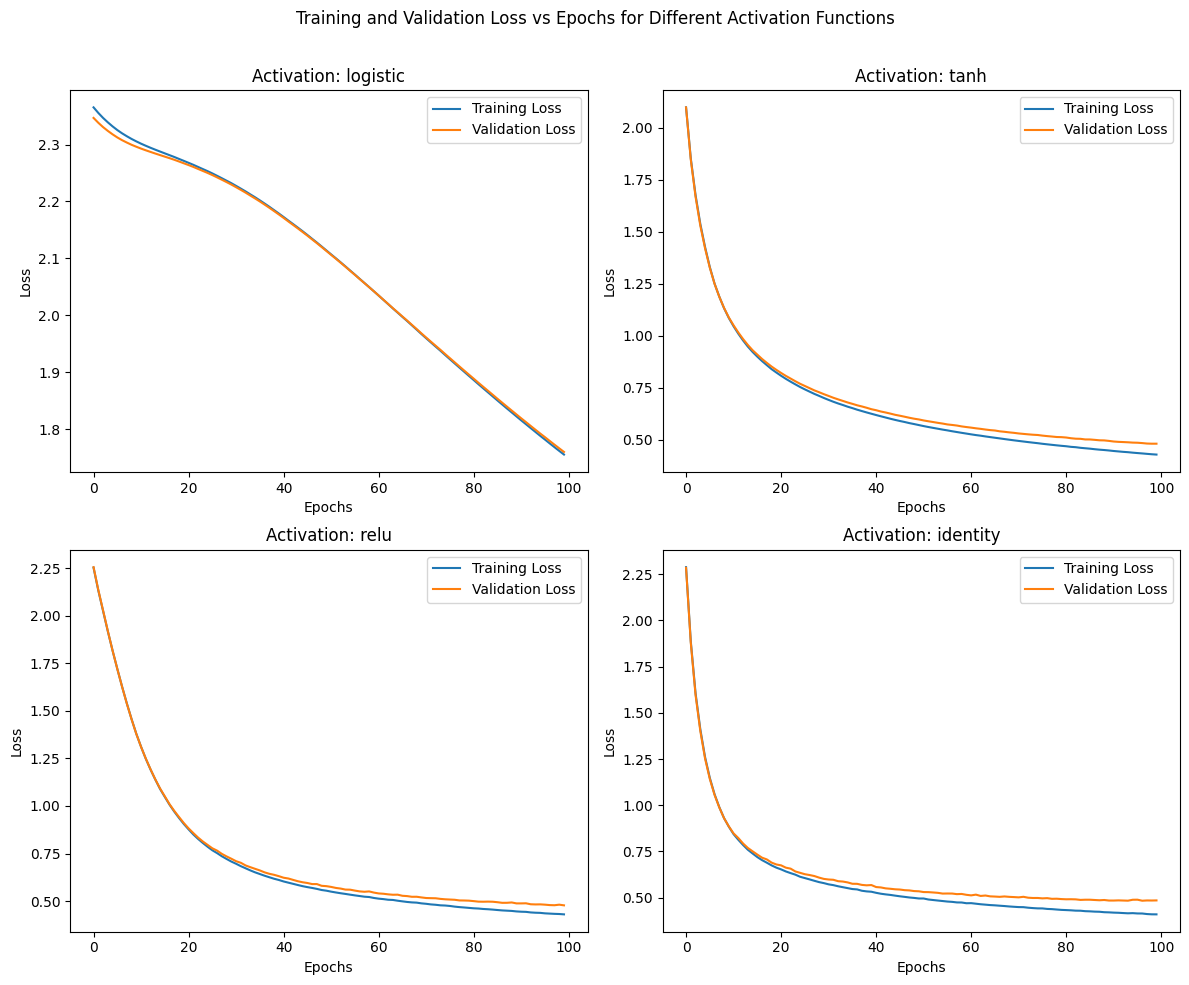

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the CSV files
train_data = pd.read_csv("dataset/new/fashion-mnist_train_split.csv")
test_data = pd.read_csv("dataset/new/fashion-mnist_test_split.csv")

# Separate features and labels
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1) / 255.0  # Normalize
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1) / 255.0    # Normalize

# Split train set into a smaller train and validation set
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Model parameters
hidden_layer_sizes = [128, 64, 32]
max_iter = 100
batch_size = 128
learning_rate_init = 2e-5
activations = ['logistic', 'tanh', 'relu', 'identity']

# Store results for plotting
history = {activation: {'train_loss': [], 'val_loss': []} for activation in activations}

# Open a text file to save the performance metrics
with open("performance_metrics.txt", "w") as f:
    # Train the MLPClassifier for each activation function
    for activation in activations:
        print(f"Training with activation: {activation}")
        f.write(f"Activation Function: {activation}\n")
        
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=1,  # Set to 1 so we can manually control the iterations
            batch_size=batch_size,
            solver='adam',
            learning_rate_init=learning_rate_init,
            activation=activation,
            warm_start=True  # Continue training in the loop
        )

        for epoch in range(max_iter):
            model.fit(X_train, y_train)  # Train for one iteration

            # Calculate training and validation losses
            train_loss = log_loss(y_train, model.predict_proba(X_train))
            val_loss = log_loss(y_val, model.predict_proba(X_val))

            # Record the losses
            history[activation]['train_loss'].append(train_loss)
            history[activation]['val_loss'].append(val_loss)

            # Write losses to the file
            f.write(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}\n")

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        f.write("\n")  # Separate results for different activations

# Plotting training and validation loss curves
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Training and Validation Loss vs Epochs for Different Activation Functions")

for i, activation in enumerate(activations):
    ax = axes[i // 2, i % 2]
    ax.plot(history[activation]['train_loss'], label="Training Loss")
    ax.plot(history[activation]['val_loss'], label="Validation Loss")
    ax.set_title(f"Activation: {activation}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("training_validation_loss.png")
plt.show()

# 3

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],                   # Various solvers for optimization
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],     # Different learning rates
    'batch_size': [32, 64, 128, 256]                      # Batch sizes
}

# Define the MLPClassifier model with tanh activation
mlp = MLPClassifier(
    hidden_layer_sizes=[128, 64, 32],  # Assuming the best layer structure from earlier
    max_iter=100,                      # Limit iterations to balance performance
    activation='tanh'                  # Best activation from previous findings
)

# Use log loss for scoring to match performance assessment
scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best log loss achieved: ", -grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .batch_size=32, learning_rate_init=0.1, solver=adam; total time=   3.6s
[CV] END .batch_size=32, learning_rate_init=0.1, solver=adam; total time=   4.2s
[CV] END ..batch_size=32, learning_rate_init=0.1, solver=sgd; total time=   5.1s
[CV] END ..batch_size=32, learning_rate_init=0.1, solver=sgd; total time=   5.4s
[CV] END .batch_size=32, learning_rate_init=0.1, solver=adam; total time=   6.6s
[CV] END batch_size=32, learning_rate_init=0.01, solver=adam; total time=   6.9s
[CV] END ..batch_size=32, learning_rate_init=0.1, solver=sgd; total time=   3.9s
[CV] END batch_size=32, learning_rate_init=0.01, solver=adam; total time=   7.7s
[CV] END batch_size=32, learning_rate_init=0.01, solver=adam; total time=   8.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.001, solver=lbfgs; total time=   9.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.001, solver=lbfgs; total time=   9.7s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=lbfgs; total time=   9.8s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: Conv

[CV] END batch_size=32, learning_rate_init=0.0001, solver=lbfgs; total time=  10.0s
[CV] END batch_size=32, learning_rate_init=0.001, solver=lbfgs; total time=  10.0s
[CV] END batch_size=32, learning_rate_init=0.01, solver=lbfgs; total time=  10.1s
[CV] END batch_size=32, learning_rate_init=0.01, solver=lbfgs; total time=  10.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.0001, solver=lbfgs; total time=  10.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.01, solver=lbfgs; total time=  10.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.1, solver=lbfgs; total time=   9.5s
[CV] END .batch_size=32, learning_rate_init=0.01, solver=sgd; total time=  14.9s
[CV] END batch_size=32, learning_rate_init=0.1, solver=lbfgs; total time=   9.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=32, learning_rate_init=0.1, solver=lbfgs; total time=  10.4s
[CV] END .batch_size=32, learning_rate_init=0.01, solver=sgd; total time=  18.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=   9.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=   9.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.0001, solver=lbfgs; total time=   9.8s
[CV] END .batch_size=32, learning_rate_init=0.01, solver=sgd; total time=  20.3s
[CV] END batch_size=32, learning_rate_init=0.001, solver=adam; total time=  20.5s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=sgd; total time=  20.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=32, learning_rate_init=0.001, solver=adam; total time=  20.9s
[CV] END batch_size=32, learning_rate_init=0.001, solver=sgd; total time=  21.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=32, learning_rate_init=0.0001, solver=sgd; total time=  21.5s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=sgd; total time=  21.6s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=32, learning_rate_init=0.001, solver=sgd; total time=  22.0s
[CV] END batch_size=32, learning_rate_init=0.001, solver=sgd; total time=  22.2s
[CV] END .batch_size=64, learning_rate_init=0.1, solver=adam; total time=   2.7s
[CV] END .batch_size=64, learning_rate_init=0.1, solver=adam; total time=   2.8s
[CV] END .batch_size=64, learning_rate_init=0.1, solver=adam; total time=   2.7s
[CV] END batch_size=64, learning_rate_init=0.001, solver=lbfgs; total time=   9.9s
[CV] END batch_size=64, learning_rate_init=0.001, solver=lbfgs; total time=   9.9s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: Conv

[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time=  17.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time=  16.2s
[CV] END batch_size=64, learning_rate_init=0.001, solver=adam; total time=  15.6s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=adam; total time=  26.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.001, solver=lbfgs; total time=  10.2s
[CV] END batch_size=32, learning_rate_init=0.001, solver=adam; total time=  26.7s
[CV] END batch_size=64, learning_rate_init=0.0001, solver=sgd; total time=  18.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time=  20.6s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=adam; total time=  27.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.001, solver=sgd; total time=  17.3s
[CV] END batch_size=64, learning_rate_init=0.01, solver=adam; total time=   8.8s
[CV] END batch_size=32, learning_rate_init=0.0001, solver=adam; total time=  28.1s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.001, solver=adam; total time=  18.1s
[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time=  21.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..batch_size=64, learning_rate_init=0.1, solver=sgd; total time=   6.3s
[CV] END batch_size=64, learning_rate_init=0.01, solver=adam; total time=   9.3s
[CV] END batch_size=64, learning_rate_init=0.01, solver=adam; total time=  10.7s
[CV] END batch_size=64, learning_rate_init=0.0001, solver=adam; total time=  21.2s
[CV] END ..batch_size=64, learning_rate_init=0.1, solver=sgd; total time=   4.6s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.001, solver=sgd; total time=  18.4s
[CV] END batch_size=64, learning_rate_init=0.001, solver=adam; total time=  19.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.01, solver=lbfgs; total time=   9.8s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=64, learning_rate_init=0.001, solver=sgd; total time=  17.3s
[CV] END ..batch_size=64, learning_rate_init=0.1, solver=sgd; total time=   7.4s
[CV] END batch_size=64, learning_rate_init=0.01, solver=lbfgs; total time=  10.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.01, solver=lbfgs; total time=  11.0s
[CV] END batch_size=128, learning_rate_init=0.01, solver=adam; total time=   6.9s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.1, solver=lbfgs; total time=  11.5s
[CV] END batch_size=64, learning_rate_init=0.1, solver=lbfgs; total time=  11.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=64, learning_rate_init=0.1, solver=lbfgs; total time=  12.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .batch_size=64, learning_rate_init=0.01, solver=sgd; total time=  17.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  10.8s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .batch_size=64, learning_rate_init=0.01, solver=sgd; total time=  18.5s
[CV] END .batch_size=64, learning_rate_init=0.01, solver=sgd; total time=  18.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.1, solver=adam; total time=   2.9s
[CV] END batch_size=128, learning_rate_init=0.001, solver=lbfgs; total time=  10.5s
[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  12.1s
[CV] END batch_size=128, learning_rate_init=0.1, solver=adam; total time=   3.2s
[CV] END batch_size=128, learning_rate_init=0.0001, solver=lbfgs; total time=  13.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.1, solver=adam; total time=   3.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.001, solver=lbfgs; total time=  12.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.001, solver=lbfgs; total time=  12.9s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time=  17.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time=  16.6s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.01, solver=lbfgs; total time=  12.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time=  18.3s
[CV] END batch_size=128, learning_rate_init=0.0001, solver=adam; total time=  18.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time=  18.5s
[CV] END batch_size=128, learning_rate_init=0.001, solver=sgd; total time=  16.4s
[CV] END batch_size=128, learning_rate_init=0.01, solver=lbfgs; total time=  12.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.001, solver=sgd; total time=  16.6s
[CV] END batch_size=128, learning_rate_init=0.01, solver=adam; total time=  16.3s
[CV] END batch_size=128, learning_rate_init=0.0001, solver=sgd; total time=  19.1s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.001, solver=adam; total time=  18.2s
[CV] END .batch_size=128, learning_rate_init=0.1, solver=sgd; total time=   9.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.001, solver=adam; total time=  18.5s
[CV] END batch_size=128, learning_rate_init=0.001, solver=adam; total time=  18.7s
[CV] END batch_size=128, learning_rate_init=0.001, solver=sgd; total time=  18.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.01, solver=sgd; total time=  16.3s
[CV] END batch_size=128, learning_rate_init=0.01, solver=lbfgs; total time=  11.0s
[CV] END batch_size=128, learning_rate_init=0.01, solver=adam; total time=  17.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=128, learning_rate_init=0.01, solver=sgd; total time=  17.1s
[CV] END batch_size=128, learning_rate_init=0.01, solver=sgd; total time=  16.6s
[CV] END .batch_size=128, learning_rate_init=0.1, solver=sgd; total time=   9.8s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.1, solver=lbfgs; total time=  11.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.1, solver=lbfgs; total time=  13.4s
[CV] END batch_size=256, learning_rate_init=0.1, solver=adam; total time=   2.3s
[CV] END batch_size=256, learning_rate_init=0.1, solver=adam; total time=   4.2s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=128, learning_rate_init=0.1, solver=lbfgs; total time=  13.7s
[CV] END .batch_size=128, learning_rate_init=0.1, solver=sgd; total time=  14.9s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  11.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  10.8s
[CV] END batch_size=256, learning_rate_init=0.01, solver=adam; total time=   9.5s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.001, solver=lbfgs; total time=  11.1s
[CV] END batch_size=256, learning_rate_init=0.1, solver=adam; total time=   5.0s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=lbfgs; total time=  13.8s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.01, solver=adam; total time=  11.7s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.001, solver=lbfgs; total time=  13.6s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: Conv

[CV] END batch_size=256, learning_rate_init=0.01, solver=lbfgs; total time=  11.2s
[CV] END batch_size=256, learning_rate_init=0.01, solver=lbfgs; total time=  11.4s
[CV] END batch_size=256, learning_rate_init=0.001, solver=lbfgs; total time=  14.2s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  20.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  20.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.001, solver=adam; total time=  15.9s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conv

[CV] END batch_size=256, learning_rate_init=0.001, solver=adam; total time=  16.3s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  19.2s
[CV] END batch_size=256, learning_rate_init=0.001, solver=sgd; total time=  15.4s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  20.2s
[CV] END batch_size=256, learning_rate_init=0.001, solver=sgd; total time=  15.7s
[CV] END batch_size=256, learning_rate_init=0.0001, solver=adam; total time=  20.6s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.01, solver=lbfgs; total time=  13.4s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.0001, solver=sgd; total time=  19.1s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.01, solver=sgd; total time=  14.4s
[CV] END batch_size=256, learning_rate_init=0.01, solver=sgd; total time=  14.3s
[CV] END batch_size=256, learning_rate_init=0.01, solver=adam; total time=  15.0s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=256, learning_rate_init=0.001, solver=adam; total time=  17.4s
[CV] END batch_size=256, learning_rate_init=0.001, solver=sgd; total time=  17.3s
[CV] END batch_size=256, learning_rate_init=0.01, solver=sgd; total time=  15.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.1, solver=lbfgs; total time=   9.6s
[CV] END batch_size=256, learning_rate_init=0.1, solver=lbfgs; total time=   9.3s


/home/dhruv/Roamify/CSE343-ML/A3/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END batch_size=256, learning_rate_init=0.1, solver=lbfgs; total time=   9.1s
[CV] END .batch_size=256, learning_rate_init=0.1, solver=sgd; total time=  10.7s
[CV] END .batch_size=256, learning_rate_init=0.1, solver=sgd; total time=  11.1s
[CV] END .batch_size=256, learning_rate_init=0.1, solver=sgd; total time=  11.5s
Best parameters found:  {'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best log loss achieved:  0.4376050420625872


# 4

Training with relu activation:   1%|          | 1/100 [00:01<01:42,  1.03s/it]

Epoch 0, relu Activation - Train Loss: 0.2069, Val Loss: 0.2126


Training with relu activation:   2%|▏         | 2/100 [00:01<01:17,  1.27it/s]

Epoch 1, relu Activation - Train Loss: 0.1987, Val Loss: 0.2041


Training with relu activation:   3%|▎         | 3/100 [00:02<01:28,  1.10it/s]

Epoch 2, relu Activation - Train Loss: 0.1886, Val Loss: 0.1937


Training with relu activation:   4%|▍         | 4/100 [00:03<01:17,  1.24it/s]

Epoch 3, relu Activation - Train Loss: 0.1765, Val Loss: 0.1811


Training with relu activation:   5%|▌         | 5/100 [00:04<01:15,  1.26it/s]

Epoch 4, relu Activation - Train Loss: 0.1629, Val Loss: 0.1670


Training with relu activation:   6%|▌         | 6/100 [00:04<01:09,  1.36it/s]

Epoch 5, relu Activation - Train Loss: 0.1486, Val Loss: 0.1523


Training with relu activation:   7%|▋         | 7/100 [00:05<01:06,  1.40it/s]

Epoch 6, relu Activation - Train Loss: 0.1347, Val Loss: 0.1378


Training with relu activation:   8%|▊         | 8/100 [00:06<01:05,  1.40it/s]

Epoch 7, relu Activation - Train Loss: 0.1215, Val Loss: 0.1242


Training with relu activation:   9%|▉         | 9/100 [00:06<01:04,  1.42it/s]

Epoch 8, relu Activation - Train Loss: 0.1094, Val Loss: 0.1116


Training with relu activation:  10%|█         | 10/100 [00:07<01:04,  1.40it/s]

Epoch 9, relu Activation - Train Loss: 0.0984, Val Loss: 0.1003


Training with relu activation:  11%|█         | 11/100 [00:08<01:01,  1.44it/s]

Epoch 10, relu Activation - Train Loss: 0.0888, Val Loss: 0.0903


Training with relu activation:  12%|█▏        | 12/100 [00:08<01:02,  1.41it/s]

Epoch 11, relu Activation - Train Loss: 0.0806, Val Loss: 0.0819


Training with relu activation:  13%|█▎        | 13/100 [00:09<00:59,  1.45it/s]

Epoch 12, relu Activation - Train Loss: 0.0738, Val Loss: 0.0748


Training with relu activation:  14%|█▍        | 14/100 [00:10<00:57,  1.50it/s]

Epoch 13, relu Activation - Train Loss: 0.0683, Val Loss: 0.0691


Training with relu activation:  15%|█▌        | 15/100 [00:11<01:07,  1.27it/s]

Epoch 14, relu Activation - Train Loss: 0.0639, Val Loss: 0.0645


Training with relu activation:  16%|█▌        | 16/100 [00:11<01:01,  1.36it/s]

Epoch 15, relu Activation - Train Loss: 0.0605, Val Loss: 0.0610


Training with relu activation:  17%|█▋        | 17/100 [00:12<01:00,  1.36it/s]

Epoch 16, relu Activation - Train Loss: 0.0578, Val Loss: 0.0583


Training with relu activation:  18%|█▊        | 18/100 [00:13<00:57,  1.43it/s]

Epoch 17, relu Activation - Train Loss: 0.0557, Val Loss: 0.0561


Training with relu activation:  19%|█▉        | 19/100 [00:13<00:57,  1.41it/s]

Epoch 18, relu Activation - Train Loss: 0.0538, Val Loss: 0.0542


Training with relu activation:  20%|██        | 20/100 [00:14<00:55,  1.44it/s]

Epoch 19, relu Activation - Train Loss: 0.0522, Val Loss: 0.0526


Training with relu activation:  21%|██        | 21/100 [00:15<00:53,  1.49it/s]

Epoch 20, relu Activation - Train Loss: 0.0507, Val Loss: 0.0510


Training with relu activation:  22%|██▏       | 22/100 [00:15<00:53,  1.47it/s]

Epoch 21, relu Activation - Train Loss: 0.0494, Val Loss: 0.0496


Training with relu activation:  23%|██▎       | 23/100 [00:16<00:51,  1.49it/s]

Epoch 22, relu Activation - Train Loss: 0.0481, Val Loss: 0.0483


Training with relu activation:  24%|██▍       | 24/100 [00:17<00:53,  1.41it/s]

Epoch 23, relu Activation - Train Loss: 0.0470, Val Loss: 0.0471


Training with relu activation:  25%|██▌       | 25/100 [00:18<00:51,  1.45it/s]

Epoch 24, relu Activation - Train Loss: 0.0459, Val Loss: 0.0461


Training with relu activation:  26%|██▌       | 26/100 [00:19<00:57,  1.28it/s]

Epoch 25, relu Activation - Train Loss: 0.0450, Val Loss: 0.0451


Training with relu activation:  27%|██▋       | 27/100 [00:19<00:53,  1.37it/s]

Epoch 26, relu Activation - Train Loss: 0.0441, Val Loss: 0.0442


Training with relu activation:  28%|██▊       | 28/100 [00:20<00:50,  1.42it/s]

Epoch 27, relu Activation - Train Loss: 0.0433, Val Loss: 0.0434


Training with relu activation:  29%|██▉       | 29/100 [00:20<00:47,  1.48it/s]

Epoch 28, relu Activation - Train Loss: 0.0426, Val Loss: 0.0427


Training with relu activation:  30%|███       | 30/100 [00:21<00:45,  1.53it/s]

Epoch 29, relu Activation - Train Loss: 0.0420, Val Loss: 0.0420


Training with relu activation:  31%|███       | 31/100 [00:22<00:46,  1.48it/s]

Epoch 30, relu Activation - Train Loss: 0.0413, Val Loss: 0.0414


Training with relu activation:  32%|███▏      | 32/100 [00:22<00:44,  1.52it/s]

Epoch 31, relu Activation - Train Loss: 0.0408, Val Loss: 0.0408


Training with relu activation:  33%|███▎      | 33/100 [00:23<00:43,  1.53it/s]

Epoch 32, relu Activation - Train Loss: 0.0402, Val Loss: 0.0403


Training with relu activation:  34%|███▍      | 34/100 [00:24<00:43,  1.53it/s]

Epoch 33, relu Activation - Train Loss: 0.0397, Val Loss: 0.0398


Training with relu activation:  35%|███▌      | 35/100 [00:24<00:41,  1.56it/s]

Epoch 34, relu Activation - Train Loss: 0.0393, Val Loss: 0.0393


Training with relu activation:  36%|███▌      | 36/100 [00:25<00:45,  1.41it/s]

Epoch 35, relu Activation - Train Loss: 0.0388, Val Loss: 0.0388


Training with relu activation:  37%|███▋      | 37/100 [00:26<00:43,  1.46it/s]

Epoch 36, relu Activation - Train Loss: 0.0383, Val Loss: 0.0384


Training with relu activation:  38%|███▊      | 38/100 [00:26<00:41,  1.50it/s]

Epoch 37, relu Activation - Train Loss: 0.0379, Val Loss: 0.0380


Training with relu activation:  39%|███▉      | 39/100 [00:27<00:39,  1.53it/s]

Epoch 38, relu Activation - Train Loss: 0.0375, Val Loss: 0.0376


Training with relu activation:  40%|████      | 40/100 [00:28<00:38,  1.56it/s]

Epoch 39, relu Activation - Train Loss: 0.0371, Val Loss: 0.0372


Training with relu activation:  41%|████      | 41/100 [00:28<00:41,  1.41it/s]

Epoch 40, relu Activation - Train Loss: 0.0367, Val Loss: 0.0368


Training with relu activation:  42%|████▏     | 42/100 [00:29<00:39,  1.47it/s]

Epoch 41, relu Activation - Train Loss: 0.0364, Val Loss: 0.0364


Training with relu activation:  43%|████▎     | 43/100 [00:30<00:38,  1.49it/s]

Epoch 42, relu Activation - Train Loss: 0.0360, Val Loss: 0.0361


Training with relu activation:  44%|████▍     | 44/100 [00:30<00:36,  1.52it/s]

Epoch 43, relu Activation - Train Loss: 0.0356, Val Loss: 0.0357


Training with relu activation:  45%|████▌     | 45/100 [00:31<00:36,  1.52it/s]

Epoch 44, relu Activation - Train Loss: 0.0353, Val Loss: 0.0354


Training with relu activation:  46%|████▌     | 46/100 [00:32<00:36,  1.49it/s]

Epoch 45, relu Activation - Train Loss: 0.0350, Val Loss: 0.0351


Training with relu activation:  47%|████▋     | 47/100 [00:32<00:34,  1.52it/s]

Epoch 46, relu Activation - Train Loss: 0.0346, Val Loss: 0.0348


Training with relu activation:  48%|████▊     | 48/100 [00:33<00:34,  1.53it/s]

Epoch 47, relu Activation - Train Loss: 0.0343, Val Loss: 0.0344


Training with relu activation:  49%|████▉     | 49/100 [00:34<00:33,  1.53it/s]

Epoch 48, relu Activation - Train Loss: 0.0340, Val Loss: 0.0341


Training with relu activation:  50%|█████     | 50/100 [00:34<00:33,  1.50it/s]

Epoch 49, relu Activation - Train Loss: 0.0337, Val Loss: 0.0338


Training with relu activation:  51%|█████     | 51/100 [00:35<00:33,  1.44it/s]

Epoch 50, relu Activation - Train Loss: 0.0334, Val Loss: 0.0336


Training with relu activation:  52%|█████▏    | 52/100 [00:36<00:33,  1.44it/s]

Epoch 51, relu Activation - Train Loss: 0.0331, Val Loss: 0.0333


Training with relu activation:  53%|█████▎    | 53/100 [00:37<00:33,  1.42it/s]

Epoch 52, relu Activation - Train Loss: 0.0328, Val Loss: 0.0330


Training with relu activation:  54%|█████▍    | 54/100 [00:37<00:30,  1.49it/s]

Epoch 53, relu Activation - Train Loss: 0.0325, Val Loss: 0.0327


Training with relu activation:  55%|█████▌    | 55/100 [00:38<00:30,  1.50it/s]

Epoch 54, relu Activation - Train Loss: 0.0322, Val Loss: 0.0324


Training with relu activation:  56%|█████▌    | 56/100 [00:39<00:30,  1.42it/s]

Epoch 55, relu Activation - Train Loss: 0.0319, Val Loss: 0.0322


Training with relu activation:  57%|█████▋    | 57/100 [00:39<00:29,  1.47it/s]

Epoch 56, relu Activation - Train Loss: 0.0317, Val Loss: 0.0319


Training with relu activation:  58%|█████▊    | 58/100 [00:40<00:31,  1.34it/s]

Epoch 57, relu Activation - Train Loss: 0.0314, Val Loss: 0.0317


Training with relu activation:  59%|█████▉    | 59/100 [00:41<00:29,  1.40it/s]

Epoch 58, relu Activation - Train Loss: 0.0312, Val Loss: 0.0315


Training with relu activation:  60%|██████    | 60/100 [00:41<00:28,  1.39it/s]

Epoch 59, relu Activation - Train Loss: 0.0310, Val Loss: 0.0313


Training with relu activation:  61%|██████    | 61/100 [00:42<00:28,  1.38it/s]

Epoch 60, relu Activation - Train Loss: 0.0307, Val Loss: 0.0310


Training with relu activation:  62%|██████▏   | 62/100 [00:43<00:26,  1.45it/s]

Epoch 61, relu Activation - Train Loss: 0.0305, Val Loss: 0.0308


Training with relu activation:  63%|██████▎   | 63/100 [00:44<00:26,  1.39it/s]

Epoch 62, relu Activation - Train Loss: 0.0303, Val Loss: 0.0306


Training with relu activation:  64%|██████▍   | 64/100 [00:44<00:24,  1.47it/s]

Epoch 63, relu Activation - Train Loss: 0.0301, Val Loss: 0.0305


Training with relu activation:  65%|██████▌   | 65/100 [00:45<00:25,  1.38it/s]

Epoch 64, relu Activation - Train Loss: 0.0299, Val Loss: 0.0303


Training with relu activation:  66%|██████▌   | 66/100 [00:46<00:23,  1.43it/s]

Epoch 65, relu Activation - Train Loss: 0.0298, Val Loss: 0.0301


Training with relu activation:  67%|██████▋   | 67/100 [00:47<00:24,  1.34it/s]

Epoch 66, relu Activation - Train Loss: 0.0296, Val Loss: 0.0299


Training with relu activation:  68%|██████▊   | 68/100 [00:47<00:22,  1.42it/s]

Epoch 67, relu Activation - Train Loss: 0.0294, Val Loss: 0.0298


Training with relu activation:  69%|██████▉   | 69/100 [00:48<00:21,  1.42it/s]

Epoch 68, relu Activation - Train Loss: 0.0292, Val Loss: 0.0296


Training with relu activation:  70%|███████   | 70/100 [00:48<00:20,  1.47it/s]

Epoch 69, relu Activation - Train Loss: 0.0291, Val Loss: 0.0295


Training with relu activation:  71%|███████   | 71/100 [00:49<00:19,  1.51it/s]

Epoch 70, relu Activation - Train Loss: 0.0289, Val Loss: 0.0293


Training with relu activation:  72%|███████▏  | 72/100 [00:50<00:18,  1.49it/s]

Epoch 71, relu Activation - Train Loss: 0.0288, Val Loss: 0.0292


Training with relu activation:  73%|███████▎  | 73/100 [00:51<00:19,  1.42it/s]

Epoch 72, relu Activation - Train Loss: 0.0287, Val Loss: 0.0290


Training with relu activation:  74%|███████▍  | 74/100 [00:51<00:17,  1.45it/s]

Epoch 73, relu Activation - Train Loss: 0.0285, Val Loss: 0.0289


Training with relu activation:  75%|███████▌  | 75/100 [00:52<00:16,  1.50it/s]

Epoch 74, relu Activation - Train Loss: 0.0284, Val Loss: 0.0288


Training with relu activation:  76%|███████▌  | 76/100 [00:52<00:15,  1.54it/s]

Epoch 75, relu Activation - Train Loss: 0.0283, Val Loss: 0.0287


Training with relu activation:  77%|███████▋  | 77/100 [00:53<00:16,  1.42it/s]

Epoch 76, relu Activation - Train Loss: 0.0281, Val Loss: 0.0285


Training with relu activation:  78%|███████▊  | 78/100 [00:54<00:15,  1.45it/s]

Epoch 77, relu Activation - Train Loss: 0.0280, Val Loss: 0.0284


Training with relu activation:  79%|███████▉  | 79/100 [00:55<00:14,  1.48it/s]

Epoch 78, relu Activation - Train Loss: 0.0279, Val Loss: 0.0283


Training with relu activation:  80%|████████  | 80/100 [00:55<00:13,  1.54it/s]

Epoch 79, relu Activation - Train Loss: 0.0278, Val Loss: 0.0282


Training with relu activation:  81%|████████  | 81/100 [00:56<00:12,  1.56it/s]

Epoch 80, relu Activation - Train Loss: 0.0277, Val Loss: 0.0281


Training with relu activation:  82%|████████▏ | 82/100 [00:57<00:13,  1.36it/s]

Epoch 81, relu Activation - Train Loss: 0.0276, Val Loss: 0.0280


Training with relu activation:  83%|████████▎ | 83/100 [00:57<00:11,  1.43it/s]

Epoch 82, relu Activation - Train Loss: 0.0275, Val Loss: 0.0279


Training with relu activation:  84%|████████▍ | 84/100 [00:58<00:11,  1.44it/s]

Epoch 83, relu Activation - Train Loss: 0.0274, Val Loss: 0.0278


Training with relu activation:  85%|████████▌ | 85/100 [00:59<00:10,  1.43it/s]

Epoch 84, relu Activation - Train Loss: 0.0273, Val Loss: 0.0276


Training with relu activation:  86%|████████▌ | 86/100 [00:59<00:09,  1.49it/s]

Epoch 85, relu Activation - Train Loss: 0.0272, Val Loss: 0.0275


Training with relu activation:  87%|████████▋ | 87/100 [01:00<00:09,  1.44it/s]

Epoch 86, relu Activation - Train Loss: 0.0271, Val Loss: 0.0275


Training with relu activation:  88%|████████▊ | 88/100 [01:01<00:07,  1.51it/s]

Epoch 87, relu Activation - Train Loss: 0.0270, Val Loss: 0.0274


Training with relu activation:  89%|████████▉ | 89/100 [01:01<00:07,  1.42it/s]

Epoch 88, relu Activation - Train Loss: 0.0269, Val Loss: 0.0273


Training with relu activation:  90%|█████████ | 90/100 [01:02<00:06,  1.48it/s]

Epoch 89, relu Activation - Train Loss: 0.0268, Val Loss: 0.0272


Training with relu activation:  91%|█████████ | 91/100 [01:03<00:06,  1.46it/s]

Epoch 90, relu Activation - Train Loss: 0.0267, Val Loss: 0.0271


Training with relu activation:  92%|█████████▏| 92/100 [01:03<00:05,  1.52it/s]

Epoch 91, relu Activation - Train Loss: 0.0266, Val Loss: 0.0270


Training with relu activation:  93%|█████████▎| 93/100 [01:04<00:04,  1.48it/s]

Epoch 92, relu Activation - Train Loss: 0.0265, Val Loss: 0.0269


Training with relu activation:  94%|█████████▍| 94/100 [01:05<00:04,  1.41it/s]

Epoch 93, relu Activation - Train Loss: 0.0265, Val Loss: 0.0268


Training with relu activation:  95%|█████████▌| 95/100 [01:06<00:03,  1.47it/s]

Epoch 94, relu Activation - Train Loss: 0.0264, Val Loss: 0.0268


Training with relu activation:  96%|█████████▌| 96/100 [01:06<00:02,  1.36it/s]

Epoch 95, relu Activation - Train Loss: 0.0263, Val Loss: 0.0267


Training with relu activation:  97%|█████████▋| 97/100 [01:07<00:02,  1.39it/s]

Epoch 96, relu Activation - Train Loss: 0.0262, Val Loss: 0.0266


Training with relu activation:  98%|█████████▊| 98/100 [01:08<00:01,  1.41it/s]

Epoch 97, relu Activation - Train Loss: 0.0262, Val Loss: 0.0265


Training with relu activation:  99%|█████████▉| 99/100 [01:08<00:00,  1.44it/s]

Epoch 98, relu Activation - Train Loss: 0.0261, Val Loss: 0.0265


Training with relu activation: 100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


Epoch 99, relu Activation - Train Loss: 0.0260, Val Loss: 0.0264


Training with identity activation:   1%|          | 1/100 [00:01<01:44,  1.06s/it]

Epoch 0, identity Activation - Train Loss: 0.2171, Val Loss: 0.2225


Training with identity activation:   2%|▏         | 2/100 [00:02<01:38,  1.01s/it]

Epoch 1, identity Activation - Train Loss: 0.1933, Val Loss: 0.1980


Training with identity activation:   3%|▎         | 3/100 [00:03<01:37,  1.01s/it]

Epoch 2, identity Activation - Train Loss: 0.1715, Val Loss: 0.1756


Training with identity activation:   4%|▍         | 4/100 [00:04<01:42,  1.06s/it]

Epoch 3, identity Activation - Train Loss: 0.1501, Val Loss: 0.1535


Training with identity activation:   5%|▌         | 5/100 [00:05<01:36,  1.02s/it]

Epoch 4, identity Activation - Train Loss: 0.1303, Val Loss: 0.1330


Training with identity activation:   6%|▌         | 6/100 [00:06<01:35,  1.02s/it]

Epoch 5, identity Activation - Train Loss: 0.1127, Val Loss: 0.1149


Training with identity activation:   7%|▋         | 7/100 [00:06<01:21,  1.14it/s]

Epoch 6, identity Activation - Train Loss: 0.0980, Val Loss: 0.0997


Training with identity activation:   8%|▊         | 8/100 [00:07<01:24,  1.08it/s]

Epoch 7, identity Activation - Train Loss: 0.0863, Val Loss: 0.0875


Training with identity activation:   9%|▉         | 9/100 [00:08<01:27,  1.04it/s]

Epoch 8, identity Activation - Train Loss: 0.0772, Val Loss: 0.0782


Training with identity activation:  10%|█         | 10/100 [00:09<01:26,  1.04it/s]

Epoch 9, identity Activation - Train Loss: 0.0704, Val Loss: 0.0712


Training with identity activation:  11%|█         | 11/100 [00:10<01:17,  1.14it/s]

Epoch 10, identity Activation - Train Loss: 0.0656, Val Loss: 0.0663


Training with identity activation:  12%|█▏        | 12/100 [00:11<01:18,  1.12it/s]

Epoch 11, identity Activation - Train Loss: 0.0620, Val Loss: 0.0626


Training with identity activation:  13%|█▎        | 13/100 [00:12<01:19,  1.09it/s]

Epoch 12, identity Activation - Train Loss: 0.0593, Val Loss: 0.0598


Training with identity activation:  14%|█▍        | 14/100 [00:13<01:20,  1.07it/s]

Epoch 13, identity Activation - Train Loss: 0.0569, Val Loss: 0.0574


Training with identity activation:  15%|█▌        | 15/100 [00:14<01:22,  1.03it/s]

Epoch 14, identity Activation - Train Loss: 0.0548, Val Loss: 0.0551


Training with identity activation:  16%|█▌        | 16/100 [00:14<01:11,  1.17it/s]

Epoch 15, identity Activation - Train Loss: 0.0527, Val Loss: 0.0530


Training with identity activation:  17%|█▋        | 17/100 [00:15<01:15,  1.10it/s]

Epoch 16, identity Activation - Train Loss: 0.0507, Val Loss: 0.0510


Training with identity activation:  18%|█▊        | 18/100 [00:16<01:15,  1.09it/s]

Epoch 17, identity Activation - Train Loss: 0.0489, Val Loss: 0.0491


Training with identity activation:  19%|█▉        | 19/100 [00:17<01:06,  1.21it/s]

Epoch 18, identity Activation - Train Loss: 0.0472, Val Loss: 0.0474


Training with identity activation:  20%|██        | 20/100 [00:18<01:09,  1.15it/s]

Epoch 19, identity Activation - Train Loss: 0.0457, Val Loss: 0.0458


Training with identity activation:  21%|██        | 21/100 [00:19<01:11,  1.10it/s]

Epoch 20, identity Activation - Train Loss: 0.0443, Val Loss: 0.0444


Training with identity activation:  22%|██▏       | 22/100 [00:20<01:14,  1.05it/s]

Epoch 21, identity Activation - Train Loss: 0.0431, Val Loss: 0.0432


Training with identity activation:  23%|██▎       | 23/100 [00:21<01:05,  1.18it/s]

Epoch 22, identity Activation - Train Loss: 0.0419, Val Loss: 0.0420


Training with identity activation:  24%|██▍       | 24/100 [00:22<01:08,  1.11it/s]

Epoch 23, identity Activation - Train Loss: 0.0409, Val Loss: 0.0410


Training with identity activation:  25%|██▌       | 25/100 [00:22<01:01,  1.23it/s]

Epoch 24, identity Activation - Train Loss: 0.0400, Val Loss: 0.0401


Training with identity activation:  26%|██▌       | 26/100 [00:23<00:55,  1.34it/s]

Epoch 25, identity Activation - Train Loss: 0.0392, Val Loss: 0.0393


Training with identity activation:  27%|██▋       | 27/100 [00:24<01:00,  1.22it/s]

Epoch 26, identity Activation - Train Loss: 0.0384, Val Loss: 0.0385


Training with identity activation:  28%|██▊       | 28/100 [00:24<00:54,  1.33it/s]

Epoch 27, identity Activation - Train Loss: 0.0377, Val Loss: 0.0378


Training with identity activation:  29%|██▉       | 29/100 [00:25<00:57,  1.24it/s]

Epoch 28, identity Activation - Train Loss: 0.0370, Val Loss: 0.0371


Training with identity activation:  30%|███       | 30/100 [00:26<00:51,  1.35it/s]

Epoch 29, identity Activation - Train Loss: 0.0363, Val Loss: 0.0365


Training with identity activation:  31%|███       | 31/100 [00:27<00:56,  1.21it/s]

Epoch 30, identity Activation - Train Loss: 0.0357, Val Loss: 0.0359


Training with identity activation:  32%|███▏      | 32/100 [00:28<00:55,  1.23it/s]

Epoch 31, identity Activation - Train Loss: 0.0351, Val Loss: 0.0353


Training with identity activation:  33%|███▎      | 33/100 [00:29<00:56,  1.19it/s]

Epoch 32, identity Activation - Train Loss: 0.0346, Val Loss: 0.0348


Training with identity activation:  34%|███▍      | 34/100 [00:30<00:58,  1.13it/s]

Epoch 33, identity Activation - Train Loss: 0.0340, Val Loss: 0.0343


Training with identity activation:  35%|███▌      | 35/100 [00:30<00:55,  1.16it/s]

Epoch 34, identity Activation - Train Loss: 0.0335, Val Loss: 0.0337


Training with identity activation:  36%|███▌      | 36/100 [00:31<00:57,  1.12it/s]

Epoch 35, identity Activation - Train Loss: 0.0330, Val Loss: 0.0333


Training with identity activation:  37%|███▋      | 37/100 [00:32<00:52,  1.20it/s]

Epoch 36, identity Activation - Train Loss: 0.0325, Val Loss: 0.0328


Training with identity activation:  38%|███▊      | 38/100 [00:33<00:47,  1.32it/s]

Epoch 37, identity Activation - Train Loss: 0.0320, Val Loss: 0.0323


Training with identity activation:  39%|███▉      | 39/100 [00:34<00:49,  1.23it/s]

Epoch 38, identity Activation - Train Loss: 0.0316, Val Loss: 0.0319


Training with identity activation:  40%|████      | 40/100 [00:35<00:51,  1.16it/s]

Epoch 39, identity Activation - Train Loss: 0.0311, Val Loss: 0.0315


Training with identity activation:  41%|████      | 41/100 [00:36<00:52,  1.13it/s]

Epoch 40, identity Activation - Train Loss: 0.0307, Val Loss: 0.0311


Training with identity activation:  42%|████▏     | 42/100 [00:37<00:53,  1.09it/s]

Epoch 41, identity Activation - Train Loss: 0.0304, Val Loss: 0.0307


Training with identity activation:  43%|████▎     | 43/100 [00:38<00:52,  1.09it/s]

Epoch 42, identity Activation - Train Loss: 0.0300, Val Loss: 0.0304


Training with identity activation:  44%|████▍     | 44/100 [00:39<00:52,  1.06it/s]

Epoch 43, identity Activation - Train Loss: 0.0297, Val Loss: 0.0301


Training with identity activation:  45%|████▌     | 45/100 [00:39<00:45,  1.20it/s]

Epoch 44, identity Activation - Train Loss: 0.0293, Val Loss: 0.0297


Training with identity activation:  46%|████▌     | 46/100 [00:40<00:41,  1.30it/s]

Epoch 45, identity Activation - Train Loss: 0.0290, Val Loss: 0.0294


Training with identity activation:  47%|████▋     | 47/100 [00:40<00:37,  1.40it/s]

Epoch 46, identity Activation - Train Loss: 0.0287, Val Loss: 0.0292


Training with identity activation:  48%|████▊     | 48/100 [00:41<00:35,  1.45it/s]

Epoch 47, identity Activation - Train Loss: 0.0285, Val Loss: 0.0289


Training with identity activation:  49%|████▉     | 49/100 [00:42<00:37,  1.36it/s]

Epoch 48, identity Activation - Train Loss: 0.0282, Val Loss: 0.0286


Training with identity activation:  50%|█████     | 50/100 [00:43<00:37,  1.34it/s]

Epoch 49, identity Activation - Train Loss: 0.0280, Val Loss: 0.0284


Training with identity activation:  51%|█████     | 51/100 [00:43<00:38,  1.27it/s]

Epoch 50, identity Activation - Train Loss: 0.0277, Val Loss: 0.0282


Training with identity activation:  52%|█████▏    | 52/100 [00:44<00:34,  1.38it/s]

Epoch 51, identity Activation - Train Loss: 0.0275, Val Loss: 0.0279


Training with identity activation:  53%|█████▎    | 53/100 [00:45<00:32,  1.44it/s]

Epoch 52, identity Activation - Train Loss: 0.0273, Val Loss: 0.0277


Training with identity activation:  54%|█████▍    | 54/100 [00:45<00:30,  1.51it/s]

Epoch 53, identity Activation - Train Loss: 0.0271, Val Loss: 0.0275


Training with identity activation:  55%|█████▌    | 55/100 [00:46<00:30,  1.48it/s]

Epoch 54, identity Activation - Train Loss: 0.0269, Val Loss: 0.0273


Training with identity activation:  56%|█████▌    | 56/100 [00:47<00:32,  1.35it/s]

Epoch 55, identity Activation - Train Loss: 0.0267, Val Loss: 0.0271


Training with identity activation:  57%|█████▋    | 57/100 [00:47<00:29,  1.45it/s]

Epoch 56, identity Activation - Train Loss: 0.0265, Val Loss: 0.0269


Training with identity activation:  58%|█████▊    | 58/100 [00:48<00:30,  1.37it/s]

Epoch 57, identity Activation - Train Loss: 0.0263, Val Loss: 0.0268


Training with identity activation:  59%|█████▉    | 59/100 [00:49<00:28,  1.46it/s]

Epoch 58, identity Activation - Train Loss: 0.0262, Val Loss: 0.0266


Training with identity activation:  60%|██████    | 60/100 [00:50<00:31,  1.29it/s]

Epoch 59, identity Activation - Train Loss: 0.0260, Val Loss: 0.0264


Training with identity activation:  61%|██████    | 61/100 [00:51<00:32,  1.20it/s]

Epoch 60, identity Activation - Train Loss: 0.0258, Val Loss: 0.0262


Training with identity activation:  62%|██████▏   | 62/100 [00:51<00:30,  1.23it/s]

Epoch 61, identity Activation - Train Loss: 0.0257, Val Loss: 0.0261


Training with identity activation:  63%|██████▎   | 63/100 [00:52<00:27,  1.35it/s]

Epoch 62, identity Activation - Train Loss: 0.0255, Val Loss: 0.0259


Training with identity activation:  64%|██████▍   | 64/100 [00:53<00:29,  1.22it/s]

Epoch 63, identity Activation - Train Loss: 0.0254, Val Loss: 0.0258


Training with identity activation:  65%|██████▌   | 65/100 [00:54<00:28,  1.22it/s]

Epoch 64, identity Activation - Train Loss: 0.0253, Val Loss: 0.0256


Training with identity activation:  66%|██████▌   | 66/100 [00:55<00:30,  1.13it/s]

Epoch 65, identity Activation - Train Loss: 0.0251, Val Loss: 0.0255


Training with identity activation:  67%|██████▋   | 67/100 [00:56<00:29,  1.12it/s]

Epoch 66, identity Activation - Train Loss: 0.0250, Val Loss: 0.0254


Training with identity activation:  68%|██████▊   | 68/100 [00:57<00:27,  1.15it/s]

Epoch 67, identity Activation - Train Loss: 0.0249, Val Loss: 0.0252


Training with identity activation:  69%|██████▉   | 69/100 [00:57<00:24,  1.27it/s]

Epoch 68, identity Activation - Train Loss: 0.0247, Val Loss: 0.0251


Training with identity activation:  70%|███████   | 70/100 [00:58<00:25,  1.16it/s]

Epoch 69, identity Activation - Train Loss: 0.0246, Val Loss: 0.0250


Training with identity activation:  71%|███████   | 71/100 [00:59<00:25,  1.13it/s]

Epoch 70, identity Activation - Train Loss: 0.0245, Val Loss: 0.0248


Training with identity activation:  72%|███████▏  | 72/100 [01:00<00:23,  1.21it/s]

Epoch 71, identity Activation - Train Loss: 0.0243, Val Loss: 0.0247


Training with identity activation:  73%|███████▎  | 73/100 [01:01<00:25,  1.07it/s]

Epoch 72, identity Activation - Train Loss: 0.0242, Val Loss: 0.0246


Training with identity activation:  74%|███████▍  | 74/100 [01:02<00:24,  1.06it/s]

Epoch 73, identity Activation - Train Loss: 0.0241, Val Loss: 0.0245


Training with identity activation:  75%|███████▌  | 75/100 [01:03<00:24,  1.03it/s]

Epoch 74, identity Activation - Train Loss: 0.0240, Val Loss: 0.0244


Training with identity activation:  76%|███████▌  | 76/100 [01:04<00:22,  1.04it/s]

Epoch 75, identity Activation - Train Loss: 0.0239, Val Loss: 0.0242


Training with identity activation:  77%|███████▋  | 77/100 [01:05<00:22,  1.02it/s]

Epoch 76, identity Activation - Train Loss: 0.0238, Val Loss: 0.0241


Training with identity activation:  78%|███████▊  | 78/100 [01:06<00:21,  1.04it/s]

Epoch 77, identity Activation - Train Loss: 0.0237, Val Loss: 0.0240


Training with identity activation:  79%|███████▉  | 79/100 [01:07<00:18,  1.12it/s]

Epoch 78, identity Activation - Train Loss: 0.0236, Val Loss: 0.0239


Training with identity activation:  80%|████████  | 80/100 [01:07<00:16,  1.24it/s]

Epoch 79, identity Activation - Train Loss: 0.0235, Val Loss: 0.0238


Training with identity activation:  81%|████████  | 81/100 [01:08<00:14,  1.30it/s]

Epoch 80, identity Activation - Train Loss: 0.0234, Val Loss: 0.0237


Training with identity activation:  82%|████████▏ | 82/100 [01:09<00:12,  1.41it/s]

Epoch 81, identity Activation - Train Loss: 0.0233, Val Loss: 0.0236


Training with identity activation:  83%|████████▎ | 83/100 [01:10<00:13,  1.25it/s]

Epoch 82, identity Activation - Train Loss: 0.0232, Val Loss: 0.0235


Training with identity activation:  84%|████████▍ | 84/100 [01:11<00:13,  1.19it/s]

Epoch 83, identity Activation - Train Loss: 0.0231, Val Loss: 0.0234


Training with identity activation:  85%|████████▌ | 85/100 [01:11<00:11,  1.29it/s]

Epoch 84, identity Activation - Train Loss: 0.0230, Val Loss: 0.0233


Training with identity activation:  86%|████████▌ | 86/100 [01:12<00:11,  1.22it/s]

Epoch 85, identity Activation - Train Loss: 0.0229, Val Loss: 0.0232


Training with identity activation:  87%|████████▋ | 87/100 [01:13<00:11,  1.14it/s]

Epoch 86, identity Activation - Train Loss: 0.0228, Val Loss: 0.0231


Training with identity activation:  88%|████████▊ | 88/100 [01:14<00:10,  1.20it/s]

Epoch 87, identity Activation - Train Loss: 0.0227, Val Loss: 0.0231


Training with identity activation:  89%|████████▉ | 89/100 [01:15<00:09,  1.12it/s]

Epoch 88, identity Activation - Train Loss: 0.0227, Val Loss: 0.0230


Training with identity activation:  90%|█████████ | 90/100 [01:16<00:08,  1.11it/s]

Epoch 89, identity Activation - Train Loss: 0.0226, Val Loss: 0.0229


Training with identity activation:  91%|█████████ | 91/100 [01:17<00:08,  1.05it/s]

Epoch 90, identity Activation - Train Loss: 0.0225, Val Loss: 0.0228


Training with identity activation:  92%|█████████▏| 92/100 [01:18<00:07,  1.12it/s]

Epoch 91, identity Activation - Train Loss: 0.0224, Val Loss: 0.0227


Training with identity activation:  93%|█████████▎| 93/100 [01:19<00:06,  1.07it/s]

Epoch 92, identity Activation - Train Loss: 0.0223, Val Loss: 0.0226


Training with identity activation:  94%|█████████▍| 94/100 [01:20<00:05,  1.05it/s]

Epoch 93, identity Activation - Train Loss: 0.0223, Val Loss: 0.0226


Training with identity activation:  95%|█████████▌| 95/100 [01:20<00:04,  1.16it/s]

Epoch 94, identity Activation - Train Loss: 0.0222, Val Loss: 0.0225


Training with identity activation:  96%|█████████▌| 96/100 [01:21<00:03,  1.12it/s]

Epoch 95, identity Activation - Train Loss: 0.0221, Val Loss: 0.0224


Training with identity activation:  97%|█████████▋| 97/100 [01:22<00:02,  1.10it/s]

Epoch 96, identity Activation - Train Loss: 0.0220, Val Loss: 0.0223


Training with identity activation:  98%|█████████▊| 98/100 [01:23<00:01,  1.08it/s]

Epoch 97, identity Activation - Train Loss: 0.0220, Val Loss: 0.0223


Training with identity activation:  99%|█████████▉| 99/100 [01:24<00:00,  1.21it/s]

Epoch 98, identity Activation - Train Loss: 0.0219, Val Loss: 0.0222


Training with identity activation: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

Epoch 99, identity Activation - Train Loss: 0.0218, Val Loss: 0.0221


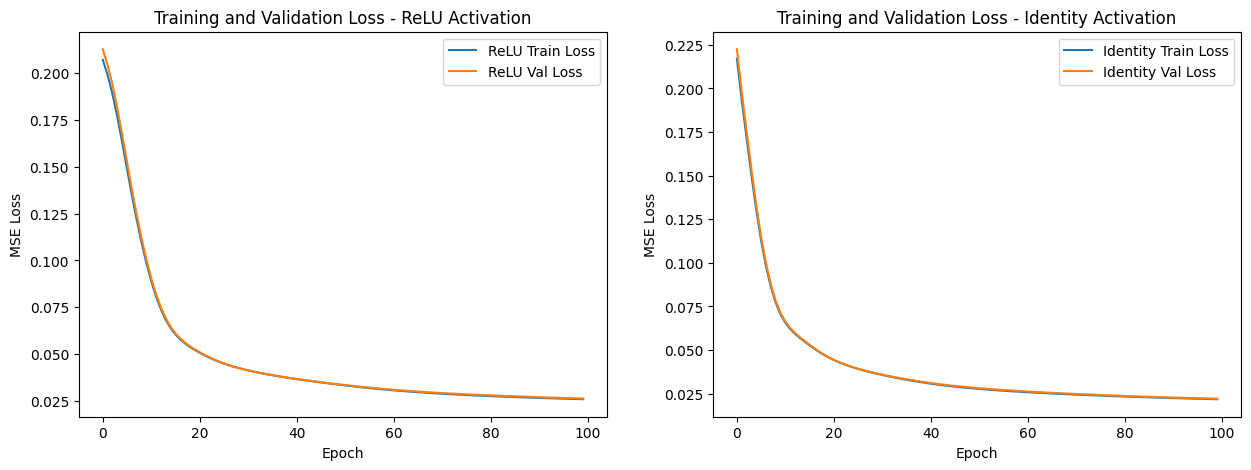

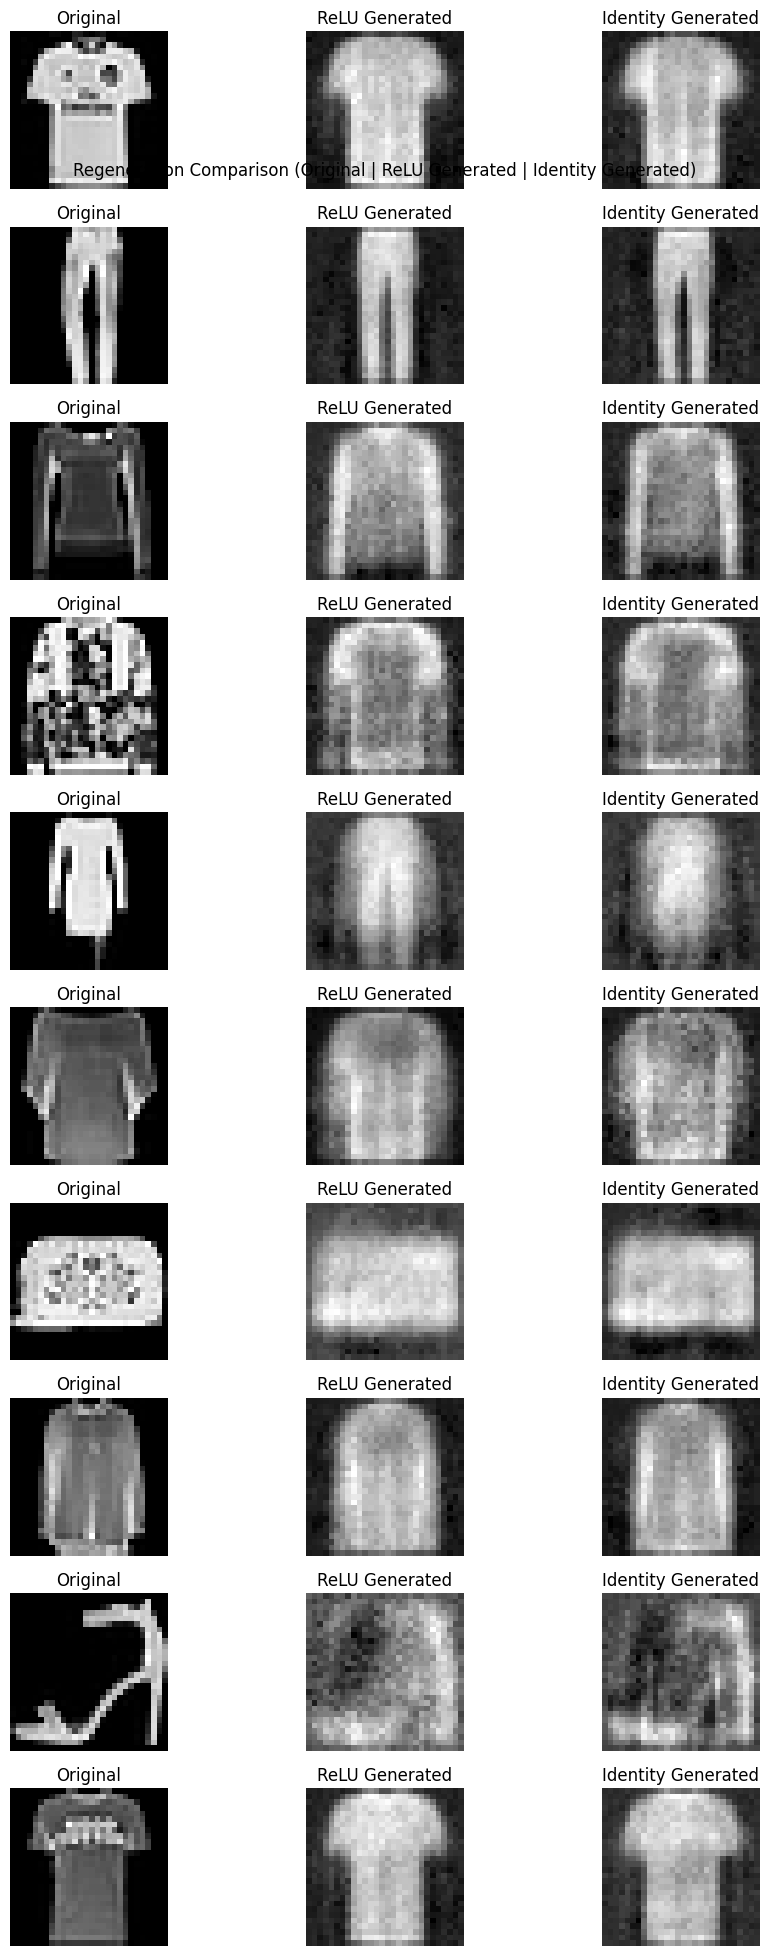

In [5]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Load the CSV files
train_data = pd.read_csv("dataset/new/fashion-mnist_train_split.csv")
test_data = pd.read_csv("dataset/new/fashion-mnist_test_split.csv")

# Separate features and labels, normalize images
train_images = train_data.drop('label', axis=1) / 255.0
test_images = test_data.drop('label', axis=1) / 255.0

# Parameters for the 5-layer network [c, b, a, b, c]
c, b, a = 128, 64, 32
layer_sizes = [c, b, a, b, c]

# Training parameters
learning_rate = 2e-5
epochs = 100

# Function to train and evaluate the MLP model
def train_and_evaluate(activation):
    model = MLPRegressor(
        hidden_layer_sizes=layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=learning_rate,
        max_iter=1,  # We will manually control epochs
        warm_start=True
    )
    
    train_losses = []
    val_losses = []
    
    for epoch in tqdm(range(epochs), desc=f"Training with {activation} activation"):
        model.fit(train_images, train_images)  # Train to regenerate images
        train_pred = model.predict(train_images)
        val_pred = model.predict(test_images)
        
        train_loss = mean_squared_error(train_images, train_pred)
        val_loss = mean_squared_error(test_images, val_pred)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        print(f"Epoch {epoch}, {activation} Activation - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    return model, train_losses, val_losses

# Train models with ReLU and Identity activations
relu_model, relu_train_losses, relu_val_losses = train_and_evaluate('relu')
identity_model, identity_train_losses, identity_val_losses = train_and_evaluate('identity')

# Plotting training and validation losses
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(relu_train_losses, label='ReLU Train Loss')
axes[0].plot(relu_val_losses, label='ReLU Val Loss')
axes[0].set_title('Training and Validation Loss - ReLU Activation')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].legend()

axes[1].plot(identity_train_losses, label='Identity Train Loss')
axes[1].plot(identity_val_losses, label='Identity Val Loss')
axes[1].set_title('Training and Validation Loss - Identity Activation')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MSE Loss')
axes[1].legend()

plt.show()

# Visualizing regenerated images
fig, axes = plt.subplots(10, 3, figsize=(10, 20))
fig.suptitle("Regeneration Comparison (Original | ReLU Generated | Identity Generated)", y=0.9)

for i in range(10):
    # Original Image
    original_img = test_images.iloc[i].values.reshape(28, 28)
    axes[i, 0].imshow(original_img, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title("Original")
    
    # ReLU Regenerated Image
    relu_output = relu_model.predict([test_images.iloc[i].values]).reshape(28, 28)
    axes[i, 1].imshow(relu_output, cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title("ReLU Generated")
    
    # Identity Regenerated Image
    identity_output = identity_model.predict([test_images.iloc[i].values]).reshape(28, 28)
    axes[i, 2].imshow(identity_output, cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title("Identity Generated")

plt.tight_layout()
plt.show()

# 5

In [6]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load data
train_data = pd.read_csv("dataset/new/fashion-mnist_train_split.csv")
test_data = pd.read_csv("dataset/new/fashion-mnist_test_split.csv")

train_labels = train_data['label']
train_images = train_data.drop('label', axis=1) / 255.0  # Normalize
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1) / 255.0    # Normalize

# Define the size of layers
c, b, a = 128, 64, 32  # Ensure c > b > a

# Train the original MLPRegressor with ReLU activation
relu_model = MLPRegressor(hidden_layer_sizes=(c, b, a, b, c), activation='relu', 
                          solver='adam', learning_rate_init=2e-5, max_iter=100, verbose=True)
relu_model.fit(train_images, train_images)  # Training to regenerate input images

# Train the original MLPRegressor with Identity activation
identity_model = MLPRegressor(hidden_layer_sizes=(c, b, a, b, c), activation='identity', 
                              solver='adam', learning_rate_init=2e-5, max_iter=100, verbose=True)
identity_model.fit(train_images, train_images)

# Extract the feature vectors (output of the third layer of size 'a')
def extract_features(model, images):
    hidden_layer_sizes = model.hidden_layer_sizes
    activations = images  # Start with the input layer

    # Sequentially apply each hidden layer transformation to get to the 'a' layer
    for i, layer_size in enumerate(hidden_layer_sizes):
        # For each layer, compute activation
        if i == 2:  # Third layer (index 2) is of size 'a'
            return model._predict(images, layer_size)  # Extracted feature vector

# Get feature vectors for train and test datasets
relu_train_features = extract_features(relu_model, train_images)
relu_test_features = extract_features(relu_model, test_images)
identity_train_features = extract_features(identity_model, train_images)
identity_test_features = extract_features(identity_model, test_images)

# Define new smaller MLP classifiers with two layers, each of size 'a'
mlp_classifier_relu = MLPClassifier(hidden_layer_sizes=(a, a), activation='relu', 
                                    solver='adam', learning_rate_init=2e-5, max_iter=200)
mlp_classifier_identity = MLPClassifier(hidden_layer_sizes=(a, a), activation='identity', 
                                        solver='adam', learning_rate_init=2e-5, max_iter=200)

# Train and evaluate the classifiers
mlp_classifier_relu.fit(relu_train_features, train_labels)
relu_pred = mlp_classifier_relu.predict(relu_test_features)
relu_accuracy = accuracy_score(test_labels, relu_pred)

mlp_classifier_identity.fit(identity_train_features, train_labels)
identity_pred = mlp_classifier_identity.predict(identity_test_features)
identity_accuracy = accuracy_score(test_labels, identity_pred)

print(f"ReLU-based feature classifier accuracy: {relu_accuracy * 100:.2f}%")
print(f"Identity-based feature classifier accuracy: {identity_accuracy * 100:.2f}%")

# Comparison with MLP Classifier from part 2
# Comment on why this method might yield a decent classifier in the report
# Explanation:
# - By extracting meaningful features from the MLPRegressor, the new MLP classifiers have
#   simpler inputs with potentially more robust, lower-dimensional representations.
# - This improves the generalization of the model and reduces noise, making the classifier
#   perform well even with fewer layers and lower complexity.

Iteration 1, loss = 0.10452863
Iteration 2, loss = 0.10107442
Iteration 3, loss = 0.09795754
Iteration 4, loss = 0.09197599
Iteration 5, loss = 0.08127045
Iteration 6, loss = 0.06838715
Iteration 7, loss = 0.05751711
Iteration 8, loss = 0.04951465
Iteration 9, loss = 0.04380921
Iteration 10, loss = 0.03988383
Iteration 11, loss = 0.03724709
Iteration 12, loss = 0.03547451
Iteration 13, loss = 0.03423083
Iteration 14, loss = 0.03328591
Iteration 15, loss = 0.03245913
Iteration 16, loss = 0.03168293
Iteration 17, loss = 0.03090739
Iteration 18, loss = 0.03012056
Iteration 19, loss = 0.02933617
Iteration 20, loss = 0.02856676
Iteration 21, loss = 0.02783051
Iteration 22, loss = 0.02713702
Iteration 23, loss = 0.02650136
Iteration 24, loss = 0.02592920
Iteration 25, loss = 0.02541473
Iteration 26, loss = 0.02495002
Iteration 27, loss = 0.02452802
Iteration 28, loss = 0.02414249
Iteration 29, loss = 0.02378708
Iteration 30, loss = 0.02345694
Iteration 31, loss = 0.02314167
Iteration 32, los